In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Use any technique we have learned so far in order to draw as-perfect-as-possible contours around these objects of interest.

<table><tr>
    <td> <img src="fish.jpg"/> </td>
    <td> <img src="football.jpg"/> </td>
    <td> <img src="smartphone.jpg"/> </td>
    <td> <img src="pom.jpg"/> </td>
    <td> <img src="jankenpo.jpg"/> </td>
</tr></table>

# Fish

(<matplotlib.axes._subplots.AxesSubplot at 0x12784ba50>,
 <matplotlib.image.AxesImage at 0x127a2c1d0>)

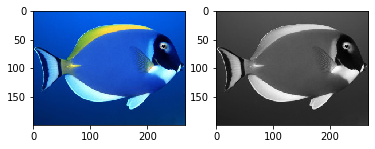

In [5]:
src_color = cv2.imread('./fish.jpg')
src_gray = cv2.imread('./fish.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(src_color, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(src_gray, cv2.COLOR_BGR2RGB))

(200, 267)


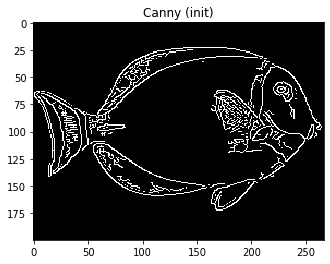

In [19]:
thres1 = 10
thres2 = 65
seg_canny = cv2.Canny(src_gray, thres1, thres2)

print( seg_canny.shape )
plt.title( 'Canny (init)' ) 
plt.imshow( seg_canny, cmap='gray' )

## Morphological Operation

(<matplotlib.image.AxesImage at 0x12937d950>, Text(0.5, 1.0, 'morp'))

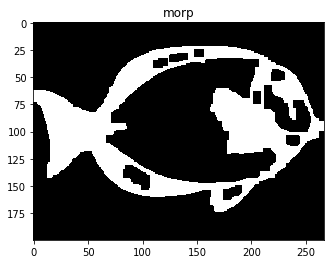

In [26]:
ksize = 3
cnt_dilate = 4
cnt_erode = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

morp_result = cv2.dilate(seg_canny, kernel, iterations = cnt_dilate)
morp_result = cv2.erode(morp_result , kernel, iterations = cnt_erode)

plt.imshow(morp_result, cmap='gray'), plt.title('morp')

Number of Contour = 1


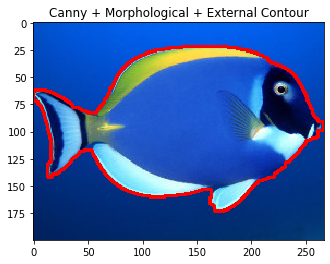

In [28]:
contours, hierachy = cv2.findContours(morp_result,
                                        cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
                                        
img = src_color.copy()
img = cv2.drawContours(img, contours, -1, (0,0,255), 2)

print('Number of Contour = ' + str(len(contours)))
plt.title('Canny + Morphological + External Contour')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(<matplotlib.image.AxesImage at 0x1298f5b90>, Text(0.5, 1.0, 'Mask'))

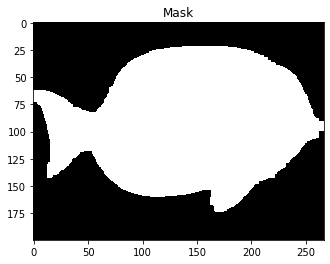

In [32]:
mask = np.zeros_like(src_gray)

cv2.drawContours(mask, contours, 0, 255, thickness=-1)

plt.imshow(mask, cmap='gray'), plt.title('Mask')

(<matplotlib.image.AxesImage at 0x129af14d0>,
 Text(0.5, 1.0, 'Fish segmentation'))

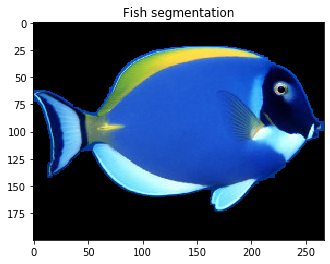

In [33]:
result = src_color.copy()
result[mask==0] = 0
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Fish segmentation')



# Ball

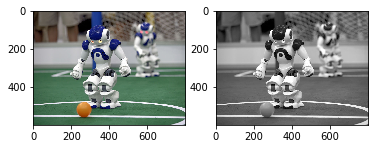

In [34]:
# Load an input image
src_color = cv2.imread('./football.jpg')
src_grey = cv2.imread('./football.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(src_color, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(src_grey, cmap='gray')

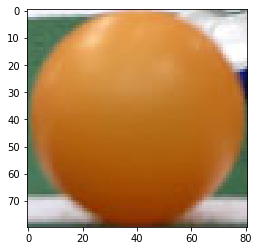

In [41]:
plt.imshow(cv2.cvtColor(src_color[480:560,226:307], cv2.COLOR_BGR2RGB))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   2.,   0.,   0.,   3.,   1.,   1.,   0.,
          1.,   3.,   0.,   0.,   1.,   4.,   3.,   0.,   4.,   0.,   2.,
          3.,   3.,   2.,   1.,   2.,   3.,   2.,   1.,   6.,   1.,   2.,
          3.,   3.,   6.,   8.,   1.,   7.,   5.,  11.,   7.,  10.,   6.,
         12.,  18.,  11.,   8.,  15.,  19.,  20.,  15.,  14.,  16.,  14.,
         12.,  17.,  24.,  26.,  26.,  39.,  46.,  36.,  43.,  48.,  33.,
         29.,  23.,  16.,  10.,   6.,  15.,  10.,  11.,  10.,   9.,   6.,
          6.,  13.,  12.,  18.,  14.,  20.,  13.,  21.,  17.,  28.,  14.,
         18.,  22.,  35.,  17.,  20., 

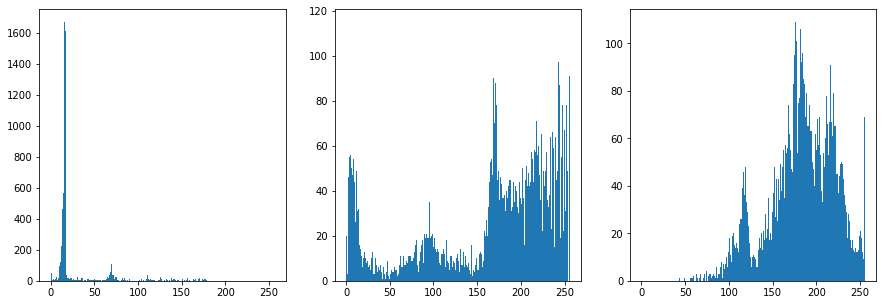

In [45]:
src_hsv = cv2.cvtColor(src_color, cv2.COLOR_BGR2HSV)
src_h = src_hsv[...,0]
src_s = src_hsv[...,1]
src_v = src_hsv[...,2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(src_h[480:560,226:307].ravel(), 256,[0,256])

plt.subplot(1,3,2)
plt.hist(src_s[480:560,226:307].ravel(), 256,[0,256])

plt.subplot(1,3,3)
plt.hist(src_v[480:560,226:307].ravel(), 256,[0,256])

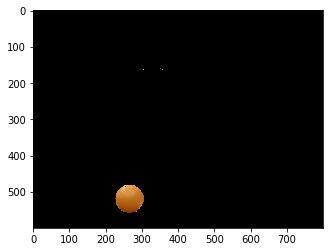

In [48]:
mask_h = cv2.inRange(src_h, 10, 20)
min_sat = 0.40
ret, mask_s = cv2.threshold(src_s, min_sat*255, 255, cv2.THRESH_BINARY)
min_v = 0.50
ret, mask_v = cv2.threshold(src_v, min_v*255, 255, cv2.THRESH_BINARY)

mask_hs = cv2.bitwise_and(mask_h, mask_s)
mask_hsv = cv2.bitwise_and(mask_hs, mask_v)

src_segment = cv2.bitwise_and(src_color, cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2BGR))
plt.imshow(cv2.cvtColor(src_segment, cv2.COLOR_BGR2RGB))

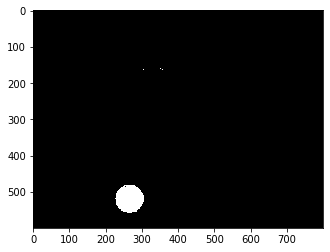

In [54]:
segment_gray = cv2.cvtColor(src_segment, cv2.COLOR_BGR2GRAY)

segment_thresh = np.zeros_like(segment_gray)
segment_thresh[segment_gray>30] = 255
plt.imshow(cv2.cvtColor(segment_thresh, cv2.COLOR_BGR2RGB))

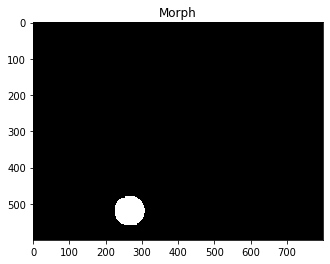

In [62]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

morp_result = cv2.erode(segment_thresh, kernel, iterations= 2)
morp_result = cv2.dilate(morp_result, kernel, iterations= 3)

plt.title( 'Morph' ) 
plt.imshow( morp_result, cmap='gray' )

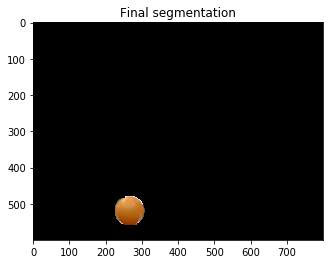

In [63]:
result = src_color.copy()
result[morp_result==0] = 0

plt.title( 'Final segmentation' ) 
plt.imshow( cv2.cvtColor( result, cv2.COLOR_BGR2RGB ) )

# Smartphone

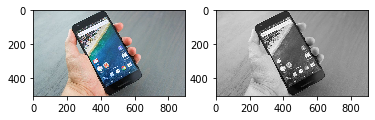

In [64]:
# Load an input image
src_color = cv2.imread('./smartphone.jpg')
src_grey = cv2.imread('./smartphone.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(src_color, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(src_grey, cmap='gray')

(<matplotlib.image.AxesImage at 0x13070d650>,
 <matplotlib.colorbar.Colorbar at 0x1304c9490>)

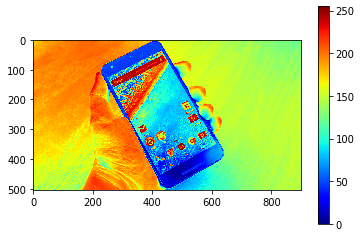

In [65]:
plt.imshow(src_grey, cmap='jet'), plt.colorbar()

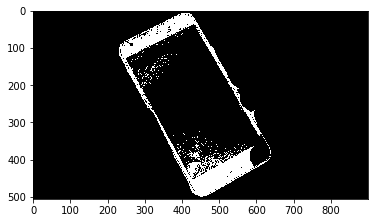

In [66]:
src_thresh = cv2.inRange(src_grey, 0, 50)
plt.imshow(src_thresh, cmap='gray')

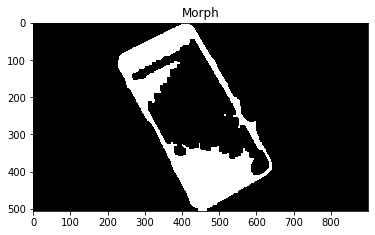

In [67]:
# morphology
ksize = 5
cnt_dilate = 4
cnt_erode = 3
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )

#morph_result = cv2.erode ( src_thresh, kernel, iterations=cnt_erode )
morph_result = cv2.dilate ( src_thresh, kernel, iterations=cnt_dilate )
morph_result = cv2.erode ( morph_result, kernel, iterations=cnt_erode )


plt.title( 'Morph' ) 
plt.imshow( morph_result, cmap='gray' )

There are 1 contours found in this image.


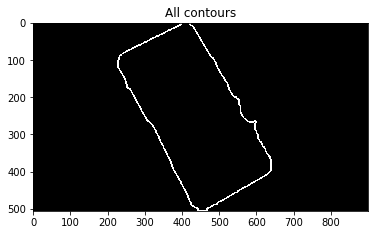

In [72]:
out = cv2.findContours(morph_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(out) == 2:
    contours,hierarchy = out
if len(out) == 3:
    _,contours,hierarchy = out
    
src_color_copy = src_color.copy() 
print('There are ' + str( len(contours) ) + ' contours found in this image.' )

draw_contour = np.zeros_like( src_color )
cv2.drawContours ( draw_contour, contours, -1, (255,255,255), 3 )    

plt.title( 'All contours' ) 
plt.imshow( cv2.cvtColor( draw_contour, cv2.COLOR_BGR2RGB ) )   

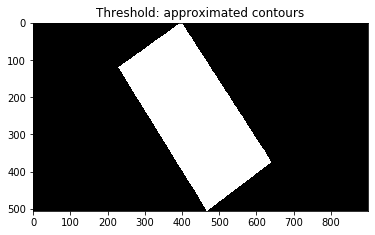

In [76]:
eps_greyth = 32

draw_contour_copy = np.zeros_like ( draw_contour )
contours_greyth_approx = []
for c in contours:
    c_approx = cv2.approxPolyDP ( c, eps_greyth, True )
    cv2.drawContours( draw_contour_copy, [c_approx],0, (255,255,255), -1 )  
    contours_greyth_approx.append( c_approx )
    
plt.title( 'Threshold: approximated contours' ) 
plt.imshow( cv2.cvtColor( draw_contour_copy, cv2.COLOR_BGR2RGB ) )       

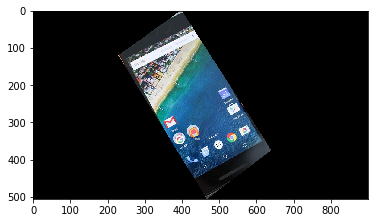

In [77]:
result = src_color.copy()
result [ draw_contour_copy == 0 ] = 0


# plt.imshow( cv2.cvtColor( result, cv2.COLOR_BGR2RGB ) )
plt.imshow(cv2.cvtColor( result, cv2.COLOR_BGR2RGB ) )

# Jukenpo

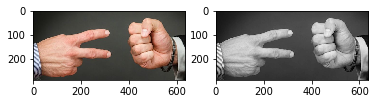

In [102]:
# Load an input image
src_color = cv2.imread('./jankenpo.jpg')
src_gray = cv2.imread('./jankenpo.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(src_color, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(src_grey, cmap='gray')

(<matplotlib.image.AxesImage at 0x132d5ba10>,
 <matplotlib.colorbar.Colorbar at 0x132d8c810>)

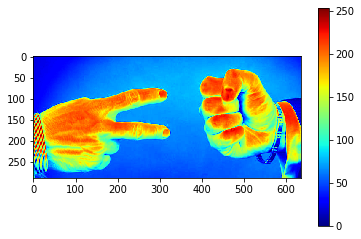

In [86]:
plt.imshow(src_gray, cmap='jet'),plt.colorbar()

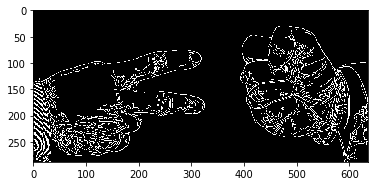

In [93]:
thresh1 = 30
thresh2 = 100
canny = cv2.Canny(src_gray, thresh1, thresh2)

plt.imshow( canny, cmap='gray' )

# Morphological Operation

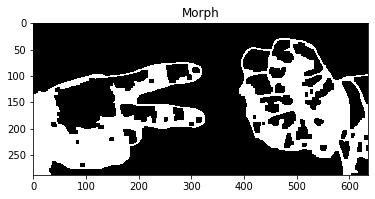

In [103]:
ksize = 3
dilate = 4
erode = 3

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize,ksize))

morp_result = cv2.dilate(canny, kernel, iterations = dilate)
morp_result = cv2.erode(morp_result, kernel ,iterations = erode)

plt.title( 'Morph' ) 
plt.imshow( morp_result, cmap='gray' )

In [106]:
contours, hierachy = cv2.findContours(morp_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

src_color_copy = src_color.copy()
print(len(countours))

2


(<matplotlib.image.AxesImage at 0x134518350>, Text(0.5, 1.0, 'Mask'))

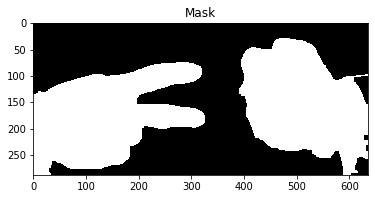

In [111]:
mask = np.zeros_like(src_color)

cv2.drawContours(mask, contours, -1, (255,255,255), thickness=-1)
plt.imshow(mask, cmap='gray'), plt.title('Mask' ) 

(<matplotlib.image.AxesImage at 0x13364a550>,
 Text(0.5, 1.0, 'Janken segmentation'))

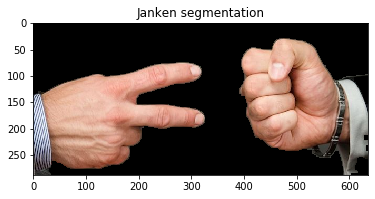

In [112]:
result = src_color.copy()
result[mask==0] = 0

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Janken segmentation')